After seeing the talk here I wanted to use Isomap on the larger MINST dataset and see if it separates the variables just as well. Below I am first copying some code from here: https://github.com/jakevdp/sklearn_pycon2015/blob/master/notebooks/02.2-Basic-Principles.ipynb
and then I am loading the MINST dataset form kaggle. The images in the tutorial slides are 8 by 8 pixels for a total of 64 variables. The images from the Kaggle competition are 28 by 28 for a total of 784 features.

Unfortunately the first 2 components don't separate the data by label for the set with the 784 features all that well. It does look that it does better than regular PCA however.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

In [3]:
from sklearn.manifold import Isomap

In [12]:
iso = Isomap(n_components=2)
data_projected = iso.fit_transform(digits.data)

In [13]:
data_projected

array([[-167.27247954,   22.18515653],
       [  48.71476497,   51.30840484],
       [ 100.719723  ,   25.82132196],
       ..., 
       [  51.43618206,  -23.29369929],
       [   0.22056414,  -73.32775967],
       [  11.36581193,  -36.23661186]])

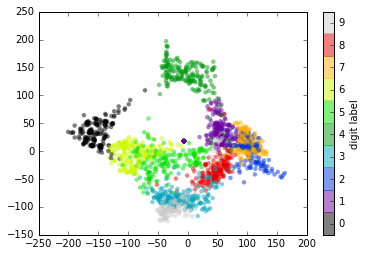

In [24]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10));
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

In [16]:
data_projected.shape

(1797, 2)

Now let's load the MINST dataset:

In [19]:
test = pd.read_csv("/Users/alexpapiu/Documents/R/MINST/train.csv")

In [20]:
type(test)

pandas.core.frame.DataFrame

In [21]:
test.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
iso = Isomap(n_components=2)

In [34]:
smalltest = test[1:2000] 

In [35]:
data_projected = iso.fit_transform(smalltest)

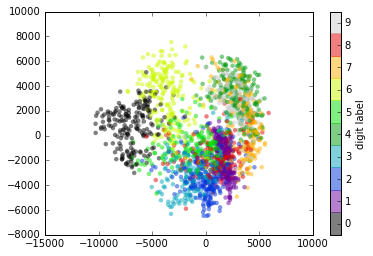

In [36]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=smalltest["label"],
           edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10));
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)